<a href="https://colab.research.google.com/github/asbahkhan/Oasis-Infobyte/blob/main/Spam_Ham_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade pillow

In [ ]:
!pip install cchardet
import cchardet

# Read the contents of the file as bytes
with open("/content/drive/Othercomputers/My Laptop/E:/spam ham/spam.csv", "rb") as file:
    file_content = file.read()

# Detect the encoding
encoding = cchardet.detect(file_content)["encoding"]

# Read the CSV file with the detected encoding
data = pd.read_csv("/content/drive/Othercomputers/My Laptop/E:/spam ham/spam.csv", encoding=encoding)

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
data.rename(columns = {'v1':'output','v2':'text'},inplace=True)
data.sample(7)

,output,text
476,ham,Love you aathi..love u lot..
3814,ham,"Not yet chikku..k, then wat abt tht guy did he..."
3315,ham,I know girls always safe and selfish know i go...
4083,ham,Quite ok but a bit ex... U better go eat smth ...
2256,ham,"Just checked out, heading out to drop off my s..."
3672,ham,Moji just informed me that you saved our lives...
2384,ham,"Sorry, I'll call later"


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['output'] = encoder.fit_transform(data['output'])
data.head()

,output,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data['output'].value_counts()   # we see that our data is imbalanced

0    4825
1     747
Name: output, dtype: int64

In [ ]:
import nltk      # Natural Language Toolkit
nltk.download('punkt') #tokenizer that splits text into sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data['num_char'] = data['text'].apply(len)
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))
data['num_sent'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,output,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# ham mail
data[data['output'] == 0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# spam mail
data[data['output']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<ipython-input-109-5f541f283c36>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)  #here we see that num_char is most related to our output so we only keep this is and drop the others


<Axes: >

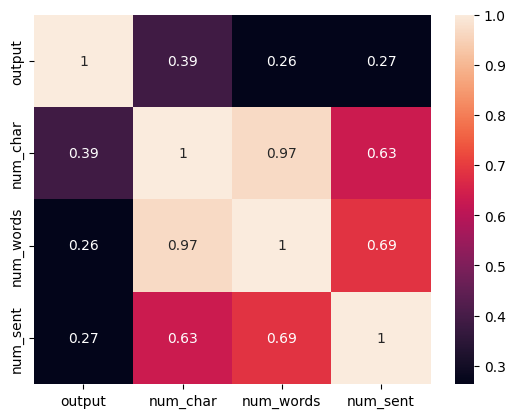

In [ ]:
sns.heatmap(data.corr(),annot=True)  #here we see that num_char is most related to our output so we only keep this is and drop the others

In [ ]:
data.drop(columns=['num_words','num_sent'],inplace=True)
data.head()

,output,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: xlabel='num_char', ylabel='Count'>

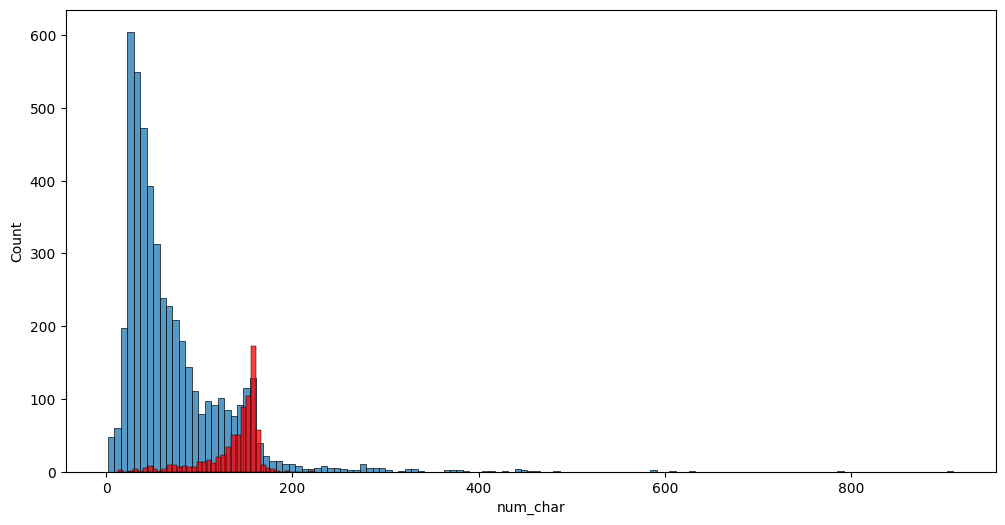

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['output']==0]['num_char'])
sns.histplot(data[data['output']==1]['num_char'],color='red')

Text Preprocessing:
1. converting words to lowercase
2. tokenize
3. removing special characters
4. removing stop words
5. Stemming

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer         # for stemming
ps = PorterStemmer()

In [ ]:
def trans_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    # removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
data['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
nltk.download('stopwords')
trans_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
data['trans_text'] = data['text'].apply(trans_text)
data.head()

,output,text,num_char,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


## Creating a word Cloud
A word cloud is a visual summary of text, showing the most frequently used words in larger and bolder fonts.

In [ ]:
!pip install wordcloud

In [ ]:
import wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,font_path = "/content/drive/Othercomputers/My Laptop/E:/spam ham/arial.ttf",background_color = 'black')

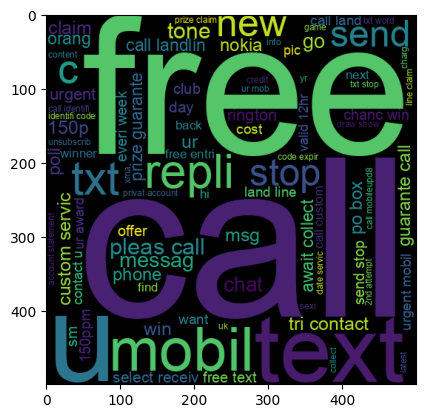

In [ ]:
spam_wc = wc.generate(data[data['output']==1]['trans_text'].str.cat(sep=" "))   #str.cat concates all text from trans text into a string separated by space
plt.imshow(spam_wc)

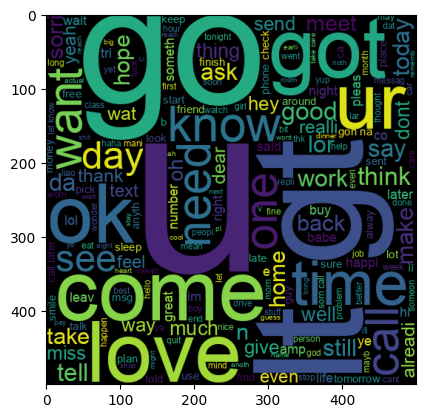

In [ ]:
ham_wc = wc.generate(data[data['output']==0]['trans_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [ ]:
# Top words which are used in spam and ham
spam_corpus = []
for msg in data[data['output'] == 1]['trans_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

11490

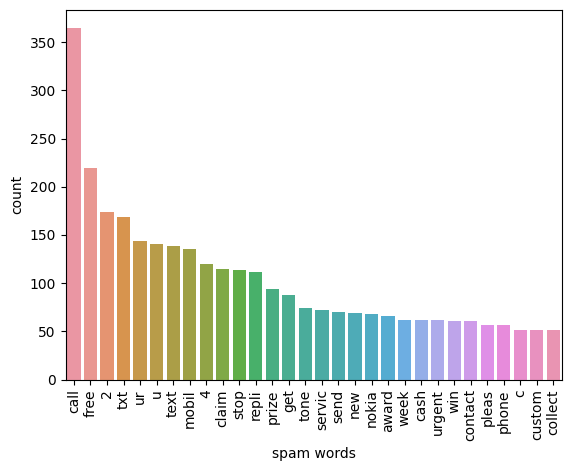

In [ ]:
from collections import Counter ## creates a dict of words and the no of times they have occured
#Counter(spam_corpus).most_common(30)
common_items = Counter(spam_corpus).most_common(30)
# Create a DataFrame from the list of tuples
df_spam = pd.DataFrame(common_items)
df_spam.columns = ['spam words','count']
sns.barplot(data=df_spam,x='spam words',y='count')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Similarly for ham
ham_corpus = []
for msg in data[data['output'] == 0]['trans_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

38221

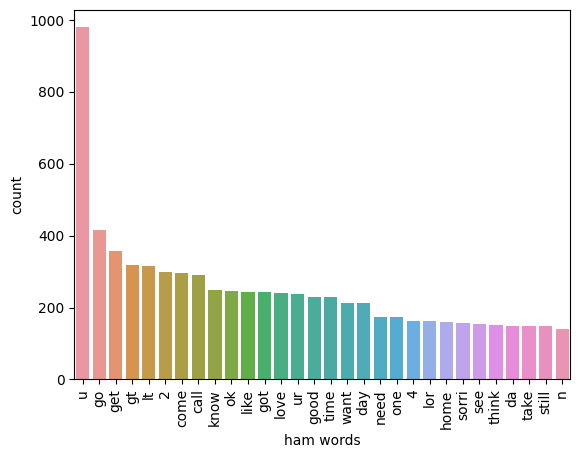

In [ ]:
# Counter(ham_corpus).most_common(30)
common_items = Counter(ham_corpus).most_common(30)
df_ham = pd.DataFrame(common_items)
df_ham.columns = ['ham words','count']
sns.barplot(data=df_ham,x='ham words',y='count')
plt.xticks(rotation='vertical')
plt.show()

MODEL BUILDING

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(data['trans_text']).toarray()
X.shape

(5572, 6708)

In [ ]:
y = data['output'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression()

In [ ]:
gnb.fit(X_train,y_train)
ypred1 = gnb.predict(X_test)
print(accuracy_score(y_test,ypred1))
print(precision_score(y_test,ypred1))

0.8690582959641255
0.5252100840336135


In [ ]:
mnb.fit(X_train,y_train)
ypred2 = mnb.predict(X_test)
print(accuracy_score(y_test,ypred2))
print(precision_score(y_test,ypred2))

0.957847533632287
1.0


In [ ]:
bnb.fit(X_train,y_train)
ypred3 = bnb.predict(X_test)
print(accuracy_score(y_test,ypred3))
print(precision_score(y_test,ypred3))

0.9695067264573991
0.9920634920634921


In [ ]:
lr.fit(X_train,y_train)
ypred4 = lr.predict(X_test)
print(accuracy_score(y_test,ypred4))
print(confusion_matrix(y_test,ypred4))
print(precision_score(y_test,ypred4))

0.9461883408071748
[[956   1]
 [ 59  99]]
0.99
